In [1]:
%matplotlib inline
from cf import CF
import matplotlib.pyplot as plt
import numpy as np
import pickle, math

items = [
    'a', 'ag', 'al', 'au', 'b', 'bb', 'bu', 'c', 'cf', 'cu', 'fb', 'fg', 'fu', 'i', 'j', 'jd', 
    'jm', 'jr', 'l', 'm', 'oi', 'p', 'pb', 'pm', 'rb', 'ri', 'rm', 'rs', 'ru', 'sr', 'ta', 'v', 
    'wh', 'wr', 'y', 'zn', 'fund'
]

item2name = {
    'a': '豆一', 'ag': '沪银', 'al': '沪铝', 'au': '沪金', 'b': '豆二', 'bb': '胶合板', 'bu': '沥青', 'c': '玉米', 'cf': '郑棉', 
    'cu': '沪铜', 'fb': '纤维板', 'fg': '玻璃', 'fu': '燃油', 'i': '铁矿石', 'j': '焦炭', 'jd': '鸡蛋', 'jm': '焦煤', 'jr': '粳稻', 
    'l': '塑料', 'm': '豆粕', 'oi': '菜油', 'p': '棕榈油', 'pb': '沪铅', 'pm': '普麦', 'rb': '螺纹钢', 'ri': '早籼稻', 'rm': '菜粕', 
    'rs': '菜籽', 'ru': '橡胶', 'sr': '白糖', 'ta': 'PTA', 'v': 'PVC', 'wh': '强麦', 'wr': '线材', 'y': '豆油', 'zn': '沪锌', 'fund': 'fund'
}

cf = CF('../merge/whole_month.data', preprocess=['log10'])

/home/lizimeng/python/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


In [2]:
res = cf.tucker([7,7,5], [3.,3.,3.,3.])
print (res.RRMSE)
print (res.sparseness)
err = (res.R-res.R_hat) / (res.R + np.ones(res.R.shape)/10**3)
err_sorted = err.reshape((-1,))
err_sorted.sort()

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-59aafa3e-2328-4231-8aca-314c17e90dcb
Send 'exit' command to kill the server
...MATLAB started and connected!
MATLAB closed
0.285113361731
(0.54188342077304896, 0.54011995981818639, 0.30132594056341955, 0.49871651959051988)


# 误差的分布

## 柱状图

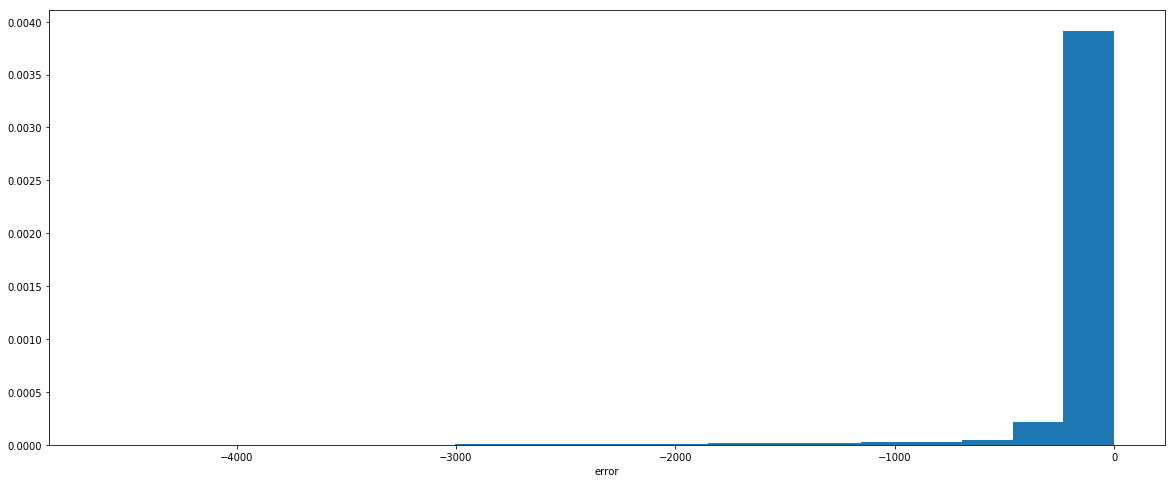

In [3]:
plt.figure(figsize=(20,8))
plt.hist(err_sorted, bins=20, normed=True)
plt.xlabel('error')
plt.show()

## 累计分布函数

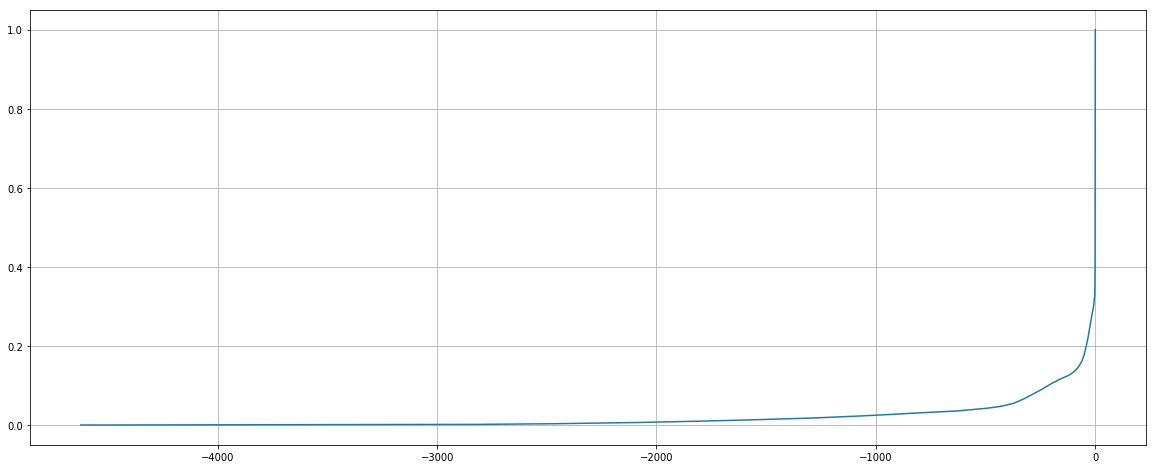

In [7]:
X = []
Y = []
for i in range(0,len(err_sorted),80):
    x = err_sorted[i]
    X.append(x)
    Y.append(i / len(err_sorted))
plt.figure(figsize=(20,8))
plt.plot(X, Y)
plt.grid()
plt.show()

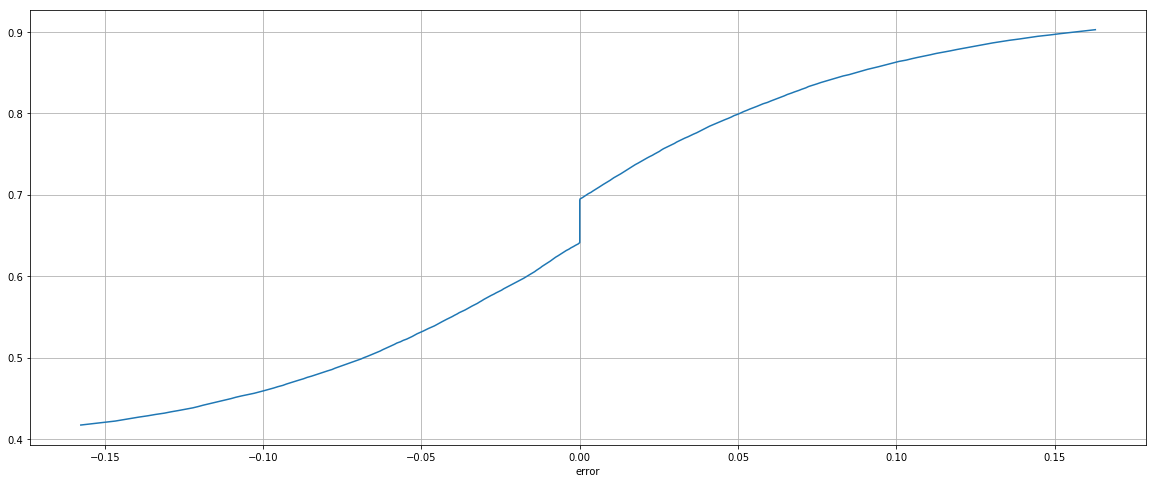

In [10]:
plt.figure(figsize=(20,8))
plt.plot(X[-360:-60],Y[-360:-60])
plt.grid()
plt.xlabel('error')
plt.show()

## 柱状图（$error \in [-5, +\infty)$）

In [ ]:
tmp = []
for e in _err:
    if e>=-5:
        tmp.append(e)
plt.figure(figsize=(20,8))
plt.hist(tmp, bins=20, normed=True)
plt.show()

# 误差从小到大排序

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(err_sorted)
plt.ylabel('error')
plt.show()

# 误差从小到大排序（只看最小的6000个）

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(err_sorted[:6000])
plt.show()

# 误差最大（绝对值）的500个，是那些？

In [ ]:
tmp = np.abs(err_sorted)
tmp.sort()
threshold = tmp[-500]
tmp = []
M,N = 41,36
for i in range(M):
    for j in range(M):
        for k in range(N):
            if abs(err[i,j,k])>= threshold:
                tmp.append([i,j,k])
print (tmp)

# 压缩时间维度，看误差在品种间的分布

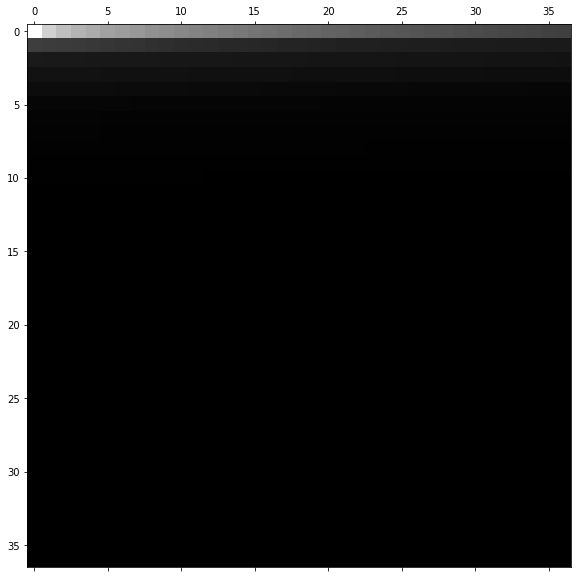

In [11]:
tmp = np.mean(np.abs(err), axis=2)
#tmp = (tmp - np.min(tmp)) / (np.max(tmp)-np.min(tmp))
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(tmp, cmap='gray')
plt.show()

In [12]:
print (tmp)

[[  3.70214460e+03   3.03082329e+03   2.77471582e+03 ...,   9.86554465e+02
    9.56494769e+02   9.29308622e+02]
 [  9.08737611e+02   8.86947450e+02   8.66717899e+02 ...,   3.92059265e+02
    3.86662259e+02   3.82267937e+02]
 [  3.76460179e+02   3.72024525e+02   3.68062412e+02 ...,   2.79779517e+02
    2.77356154e+02   2.74752328e+02]
 ..., 
 [  2.16662557e-01   2.19491084e-01   2.21797627e-01 ...,   3.04904810e-01
    3.08188359e-01   3.11254151e-01]
 [  3.14377219e-01   3.17204075e-01   3.20483024e-01 ...,   4.51226956e-01
    4.55455003e-01   4.61009789e-01]
 [  4.67562845e-01   4.72991803e-01   4.80099546e-01 ...,   9.41573799e-01
    9.71689233e-01   9.93446784e-01]]
